# O rzutowaniu funkcji na podprzestrzeń

W tym notatniku zaimplementowane zostały procedury rzutowania wektora na wektor oraz wektora na podprzestrzeń w przypadku przestrzeni funckcji rzeczywistych. Procedury takie są przydatne do przybliżania skomplikowanych funkcji przez kombinacje liniowe funkcji prostszych. Oprócz ciekawych zastosowań za pojęciami tu obecnymi kryje się bardzo ładny fragment algebry liniowej, a później analzy funkcjonalnej.

Używam tutaj jądra SageMath, dającego do dyspozycji wiele pożytecznych funkcji.

Zaczniemy od zdefiniowania funkcji potrzebnych do stworzenia funkcji rzutującej funkcje na podprzestrzenie.

Funkcja obliczająca całkę Riemanna funkcji $f$ na przedziale $[a,b]$

In [35]:
def riemann_integral(f,a,b,n):
    delta_x = (b-a)*1.0/n
    xs=[a + delta_x*i for i in range(n+1)]
    ysmid=[f((xs[i] + xs[i+1])/2) for i in range(n)]
    return round((delta_x*sum(ysmid)).n(), 8)

Funkcja obliczająca iloczyn skalarny funkcji $f$ i $g$
$$ \langle f,g \rangle =  \int_{a}^{b} f(x)g(x)\,dx $$

In [36]:
def inner_product(f,g,a,b,n):
    return riemann_integral(lambda x: f(x)*g(x),a,b,n)

Funkcja obliczająca rzut wektora v na wektor u, przy czym wektor rozumiemy jako element abstrakcyjnej przestrzeni wektorowej, dlatego ta nazwa ma sens również w kontekście rozważanych funkcji

$$ \mathrm{proj}_{u}(v) = \frac{\langle u,v \rangle}{\langle u,u \rangle} u$$

In [37]:
def proj(u,v,a,b,n):             # rzut v na u
    return (inner_product(u,v,a,b,n)/inner_product(u,u,a,b,n))*u

Funkcja przeprowadzająca ortogonalizację Grama-Schmidta

In [38]:
def gram_schmidt(baza,a,b,n):
    baza_ort = [baza[0]]
    for k in range(1,len(baza)):
        baza_ort += [baza[k] - sum([ proj(baza_ort[i], baza[k],a,b,n)  for i in range(0,k)]) ]
    return baza_ort

Sprawdźmy, czy funkcja rzeczywiście działa ortogonalizując zbiór funkcji $\{x^i \}, i = 1,...,6$  określonych na odcinku $[-1,1]$

In [39]:
gram_schmidt([x^n for n in range(1,6)],-1,1,40)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


[x,
 x^2,
 x^3 - 0.5991249981238274*x,
 x^4 - 0.71264931374718*x^2,
 x^5 - 1.1062500937875976*x^3 + 0.23581606660325222*x]

Definiujemy funkcję rzutującą wektor v na podprzestrzeń, której bazą są elementy listy ${\tt baza}$ 

$$ \mathrm{Proj}_{W}(v) = \mathrm{proj}_{u_1}(v) + \mathrm{proj}_{u_2}(v) + ... + \mathrm{proj}_{u_n}(v),  $$

gdzie $\{ u_1, u_2, ... , u_n \}$ jest bazą ortogonalną przestrzeni W.

In [40]:
def Proj(baza, v, a, b, n):
    baza_ort = gram_schmidt(baza, a, b, n)
    return sum([ proj(baza_ort[i], v, a,b,n) for i in range(0,len(baza))])

W powyższej funkcji nie wymagamy, żeby elementy listy ${\tt baza}$ były ortogonalne - wystarczy że jest to jakakolwiek baza przestrzeni $W$. W funkcji ${\tt Proj}$ przeprowadzana jest ortogonalizacja tejże bazy.

Zrzutujmy funkcję sinus na podprzestrzeń wielomianów stopnia co najwyżej 10.

In [41]:
Proj([x^n for n in range(1,10)], lambda x: sin(x), -3.1415, 3.1415 ,50)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


(2.180965461304822e-06)*x^9 - 0.00019330852966146332*x^7 + 0.008313286699584452*x^5 - 0.16663458311743892*x^3 + 0.9999857359135758*x

Zauważmy, że mamy tutaj po prostu rozwinięcie funkcji sinus w szereg Taylora w zerze.

Zobaczmy teraz jak wyglądają nasze zrzutowane funkcje na wykresach

In [42]:
def Proj_plot(baza, v, a, b, n, d):
    y= Proj(baza, v, a, b, n)
    a= a-d
    b=b+d
    (plot(v(x), (x, a,b),aspect_ratio=1, ymin=a,ymax=b, xmin=a,xmax=b, figsize=8) + plot(y(x), (x,a,b), color='red',aspect_ratio=1, ymin=a,ymax=b,xmin=a,xmax=b, figsize=8)).show()

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


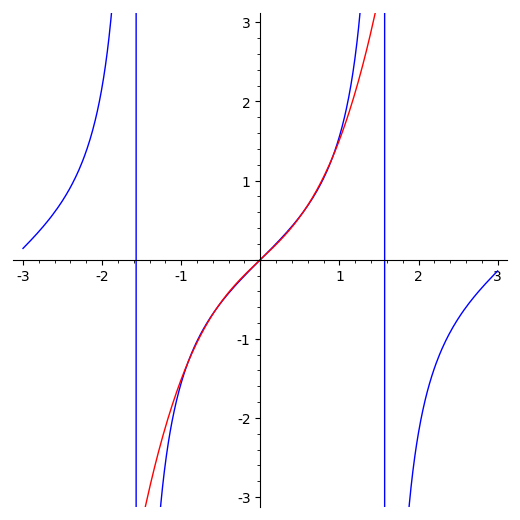

In [43]:
f(x) = tan(x)
Proj_plot([x^n for n in range(1,5)], f, -1,1,50, 2)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


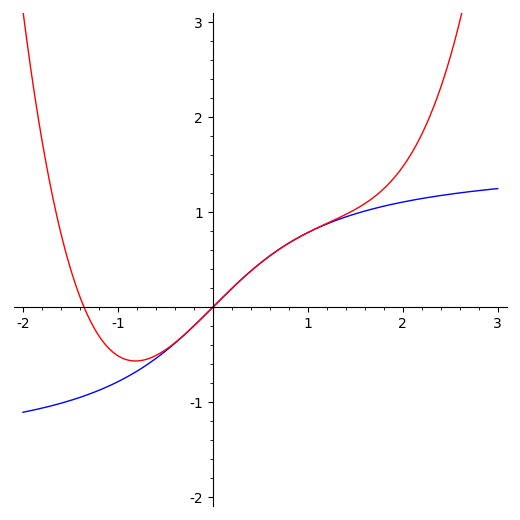

In [44]:
f(x) = atan(x)
Proj_plot([x^n for n in range(1,5)], f, 0,1,50, 2)

Możemy również rzutować funkcje na podprzestrzenie inne niż przestrzenie wielomianów.

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


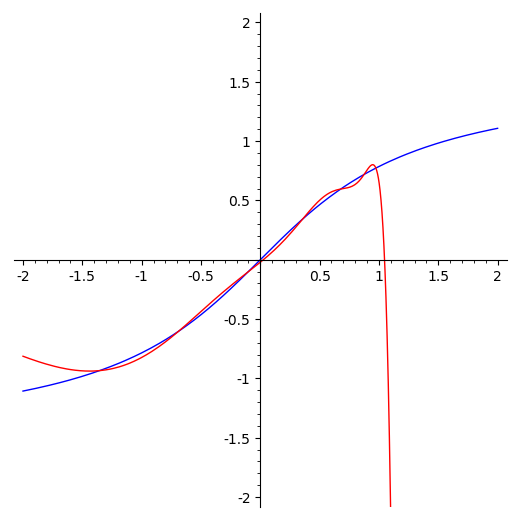

In [45]:
f(x) = atan(x)
Proj_plot([e^(n*x) for n in range(1,9)], f, -1,1,50, 1)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


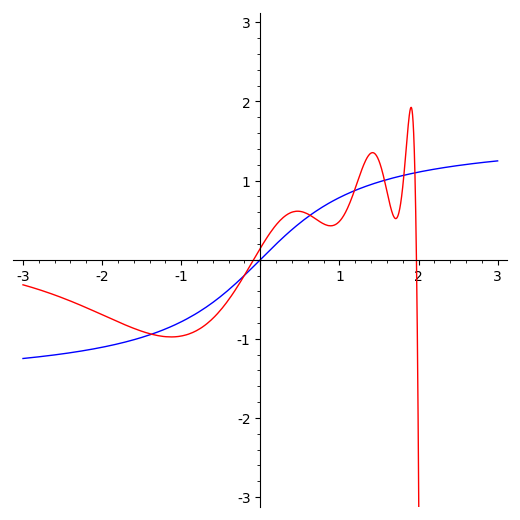

In [52]:
f(x) = atan(x)
Proj_plot([e^(n*x) for n in range(1,9)], f, -2,2,50, 1)

Spróbujmy poprawić bazę z powyższego przykładu, aby zwiększyć dokładność przybliżenia funkcji w otoczeniu zera

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


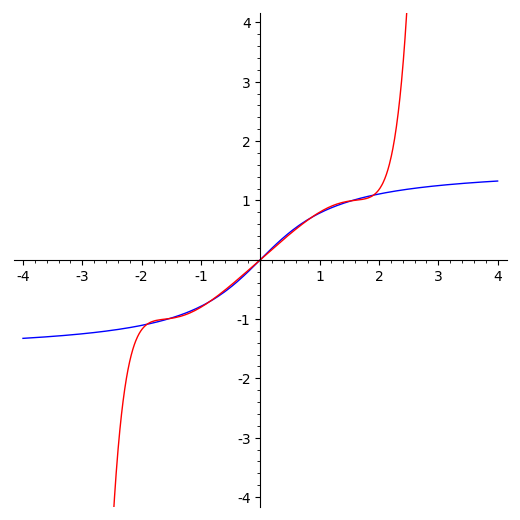

In [47]:
f(x) = atan(x)
Proj_plot([e^(n*x) for n in range(1,4)]+[e^(-n*x) for n in range(1,4)], f, -2,2,50, 2)

Spróbujmy użyć jeszcze innej bazy

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


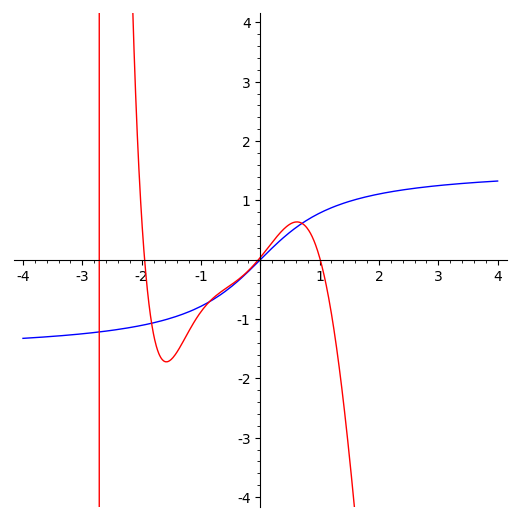

In [48]:
f(x) = atan(x)
Proj_plot([ n/(x^n+20) for n in range(1,5)], f, -1,1,20, 3)

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


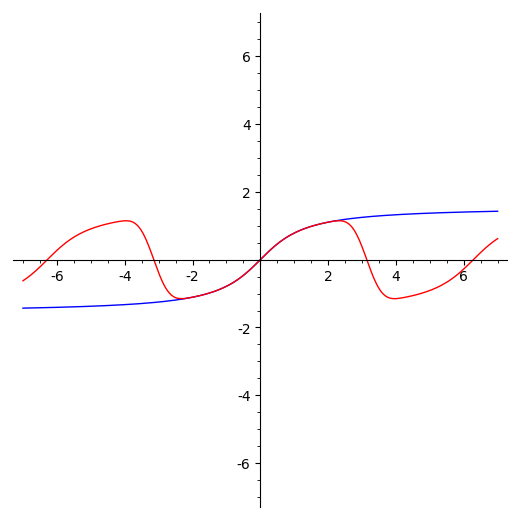

In [55]:
f(x) = atan(x)
Proj_plot([ sin(n*x) for n in range(1,10)], f, -2,2,50, 5)  

A na koniec coś wyglądającego trochę egzotycznie

/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:4: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


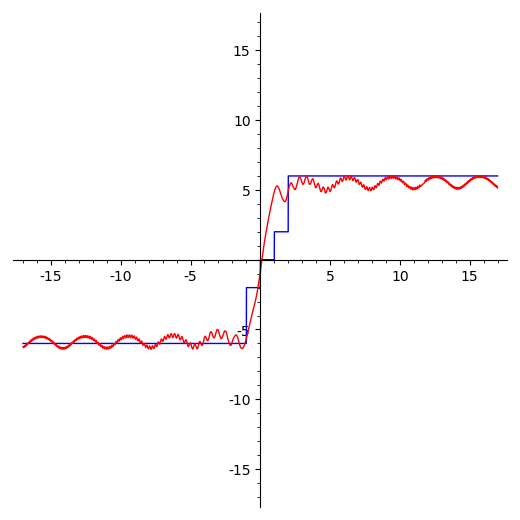

In [60]:
f(x) = sgn(x)+sgn(x-1)+2*sgn(x+1)+2*sgn(x-2)
Proj_plot( [atan(tan(x^n).diff()) for n in range(1,4)] , f, -10,10,50, 7) 